In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [119]:
def compare(lcfile, lcgrfile, title):
    lc = pd.read_csv(lcfile, sep=" ", names=("conns", "w=5", "w=7", "w=9", "w=11", "w=13"), index_col="conns")
    lcgr = pd.read_csv(lcgrfile, sep=" ", names=("conns", "w=5", "w=7", "w=9", "w=11", "w=13"), index_col="conns")

    fig, axs = plt.subplots(2, 2, figsize=(18, 10), sharey="row")

    for w in lc.columns:
        axs[0][0].plot(lc.index, lc[w], label=w)

    axs[0][0].set_title("leastconn: actual/target for each weight")
    axs[0][0].set_ylabel("actual/target")
    axs[0][0].set_xlabel("connections")
    axs[0][0].legend()

    for w in lcgr.columns:
        axs[0][1].plot(lcgr.index, lcgr[w], label=w)

    axs[0][1].set_title("leastconngr: actual/target for each weight")
    axs[0][1].set_ylabel("actual/target")
    axs[0][1].set_xlabel("connections")
    axs[0][1].legend()
    axs[0][1].tick_params(axis='y', labelleft=True)

    lc_err = abs(1 - lc)
    lcgr_err = abs(1 - lcgr)

    axs[1][0].plot(lc_err.index, lc_err.mean(axis=1), label="leastconn")
    axs[1][0].plot(lcgr_err.index, lcgr_err.mean(axis=1), label="leastconngr")
    axs[1][0].set_title("mean error (1-(actual/target)) across all weights")
    axs[1][0].set_ylabel("error")
    axs[1][0].set_xlabel("connections")
    axs[1][0].set_ylim(0, 0.25)
    axs[1][0].legend()    

    fig.suptitle(title)
    fig.tight_layout()
    
    return fig

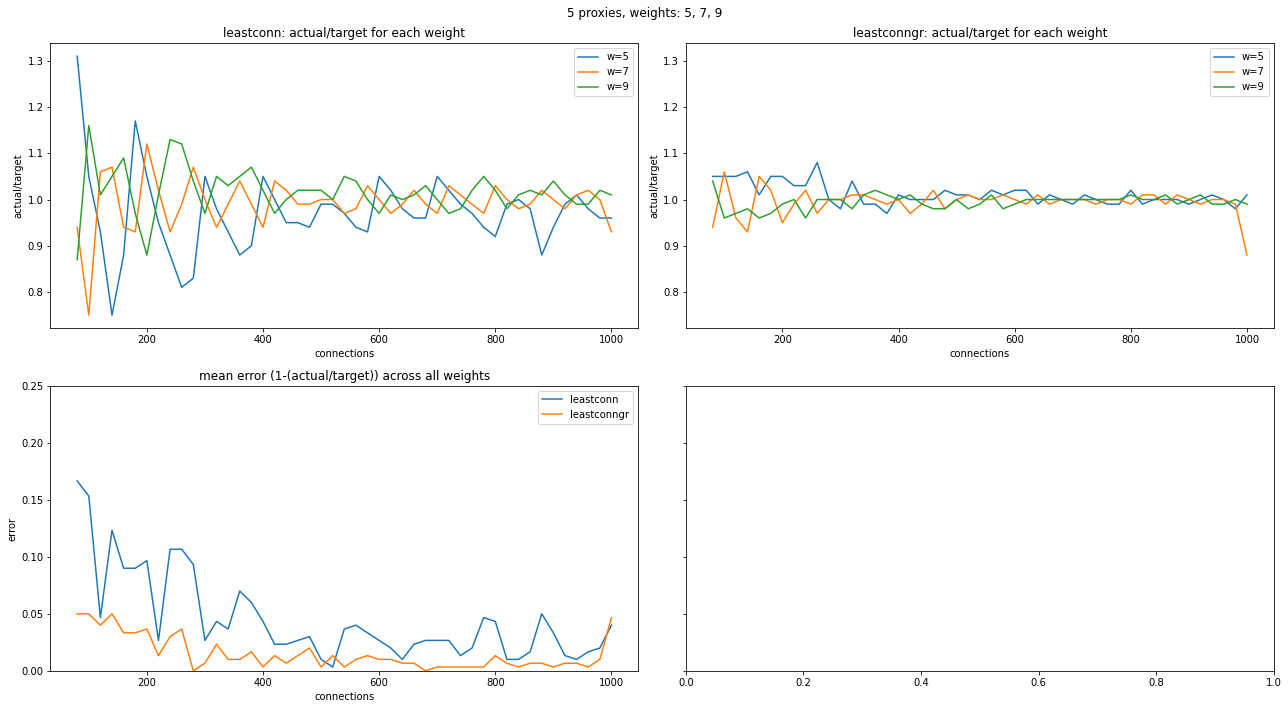

In [116]:
fig = compare("5_proxies_3_weights_leastconn", "5_proxies_3_weights_leastconngr", "5 proxies, weights: 5, 7, 9")
fig.savefig("5_proxies_3_weights.png")

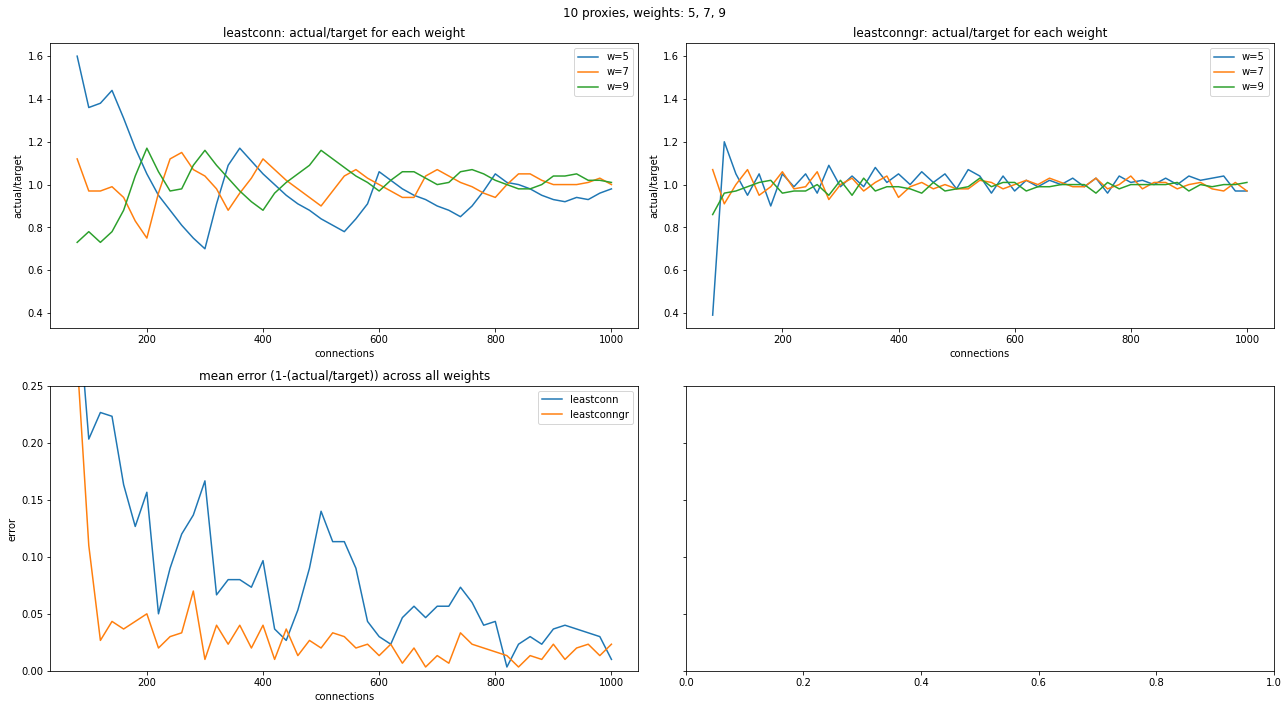

In [118]:
compare("10_proxies_3_weights_leastconn", "10_proxies_3_weights_leastconngr", "10 proxies, weights: 5, 7, 9")
fig.savefig("10_proxies_3_weights.png")

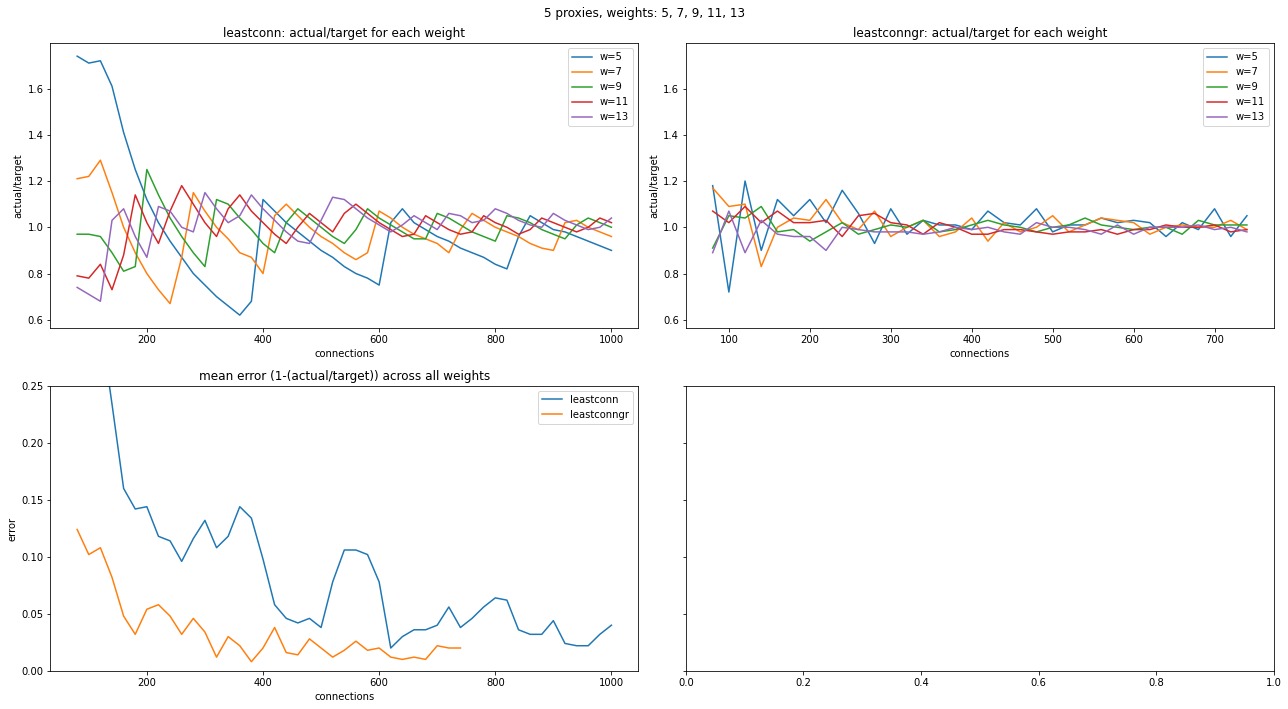

In [126]:
fig = compare("5_proxies_5_weights_leastconn", "5_proxies_5_weights_leastconngr", "5 proxies, weights: 5, 7, 9, 11, 13")
fig.savefig("5_proxies_5_weights.png")